#**Fuga de Telco**

**Contexto Comercial**

La empresa esta preocupada porque después del ultimo semestre a reportado que su indicador KPI de Churn se ha incrementado 0.5pp, a comparación del otro semestre que era de 2%,sabiendo que colocar un nuevo cliente es mucho más costoso 6 a 7 veces más que retenerlo,es por ello que necesitan buscar una solución.

**Problema Comercial**

Viendo este caso es necesario explorar los datos y buscar las principales razones de la fuga, su comportamiento y perfil de posibles clientes fuga e idear un plan de acción para retenerlo. Es por ello que se elaborará un modelo supervisado de Machine learning.

**Contexto analítico**

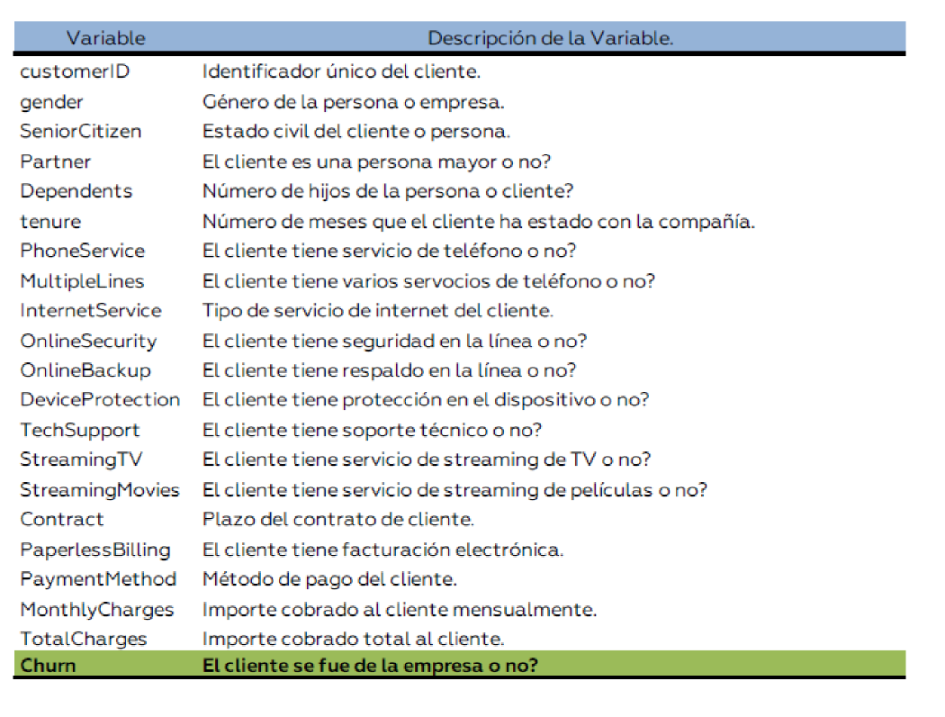

#**Abstracto,motivación y audiencia**:


**Abstracto**

En este proyecto se analizara la base de datos de los clientes, que cuentan los servicios que contrata, metodo de pago, información personal entre otros.

**Motivación**

Buscar patrones e insight de la data, y crear un algoritmo de clasificación si el cliente según sus caracteristica se va a fugar o no, para poder aplicar estrategias de retención, ya que es mucho más costoso obtener cliente nuevo que retener un cliente.

**Audiencia**

Equipo de estrategia de marketing.



#Preguntas




In [121]:
  # Importar librerias
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
# Codigo para conectar al drive el colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Proyectos/Proyecto de fuga de clientes/TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#**Exploración y calidad de datos**

In [4]:
#Para tener una perspectiva general de los datos se usa el info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Como en este caso en particular sabemos que se tiene que utilizar machine learning supervisado, la variable etiqueta o salida es Churn, ya que es la fuga.Además, se observa que en este caso particular los datos no presentan valores faltantes.**

In [5]:
#Realizamos un bucle
for col_name in df.columns:
  print(f'{col_name}:',df[f'{col_name}'].unique())
  print("*"*30)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
******************************
gender: ['Female' 'Male']
******************************
SeniorCitizen: [0 1]
******************************
Partner: ['Yes' 'No']
******************************
Dependents: ['No' 'Yes']
******************************
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
******************************
PhoneService: ['No' 'Yes']
******************************
MultipleLines: ['No phone service' 'No' 'Yes']
******************************
InternetService: ['DSL' 'Fiber optic' 'No']
******************************
OnlineSecurity: ['No' 'Yes' 'No internet service']
******************************
OnlineBackup: ['Yes' 'No' 'No internet service']
******************************
DeviceProtection: 

**Eliminamos las variables que no sean relevantes para el caso como es el CustomerID, y cambiemos los tipos de datos de acuerdo a su naturaleza**

In [6]:
df.drop(columns=["customerID"],inplace = True)


 **Como nuestro fin es realizar un modelo que prediga si un cliente se va a fugar o no, se tiene que analizar antes el modelo y encontrar caracteristicas de esto, por ende nuestro target sería Churn, se iniciara con analísis univariado y luego bivariado**

#**Análisis Univariado**

Text(0.5, 1.0, 'Genero ')

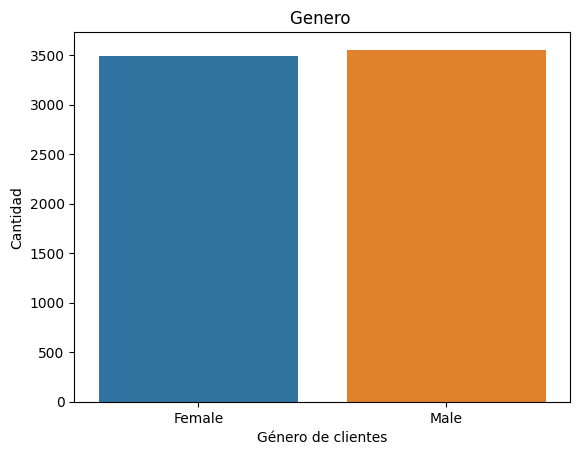

In [7]:
plt.figure()
sns.countplot(data=df,x="gender")
plt.xlabel("Género de clientes")
plt.ylabel("Cantidad")
plt.title("Genero ")

Text(0.5, 1.0, '¿Es casado el cliente?')

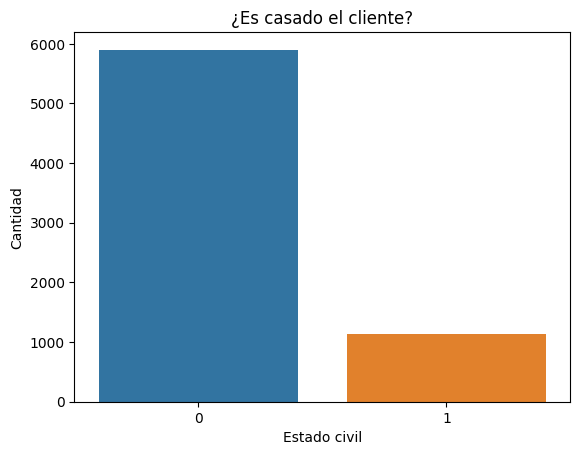

In [8]:
plt.figure()
sns.countplot(data=df,x="SeniorCitizen")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")
plt.title("¿Es casado el cliente?")

Text(0.5, 1.0, '¿El cliente es de la tercera edad?')

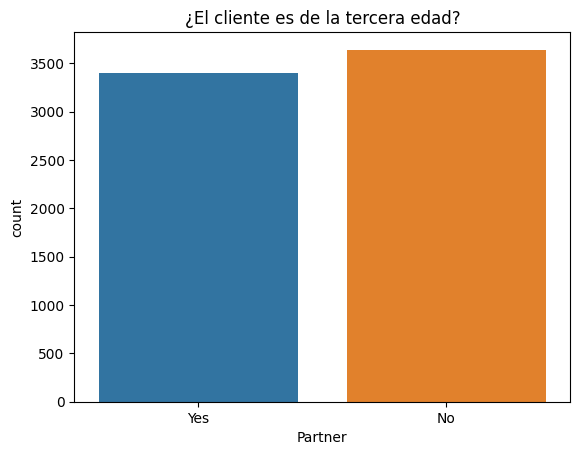

In [9]:
plt.figure()
sns.countplot(data=df,x="Partner")
plt.title("¿El cliente es de la tercera edad?")

Text(0.5, 1.0, '¿Tiene hijos?')

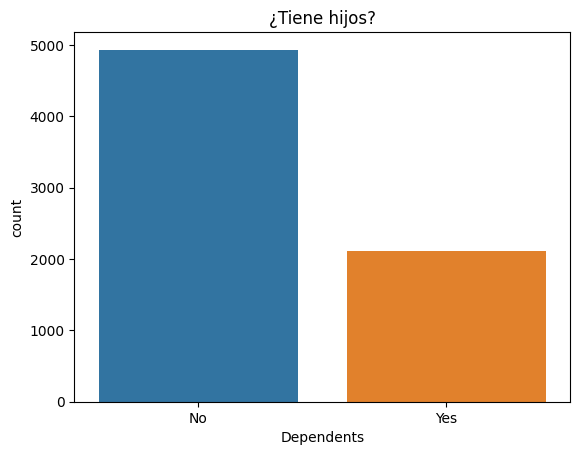

In [10]:
plt.figure()
sns.countplot(data=df,x="Dependents")
plt.title("¿Tiene hijos?")

Text(0.5, 1.0, 'Meses que ha estado en la compañia el cliente')

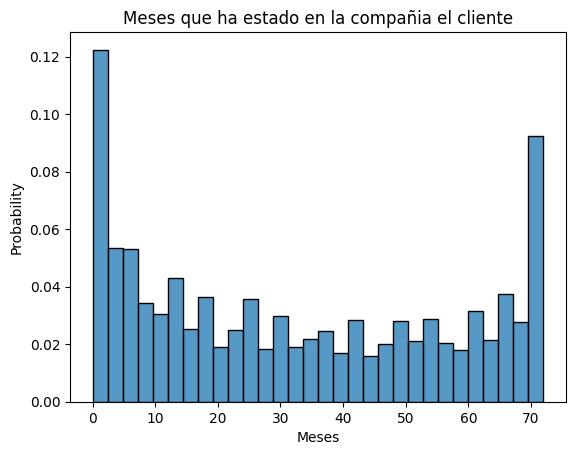

In [11]:
plt.figure()
sns.histplot(data=df, x="tenure",
             bins=30, stat = "probability")
plt.xlabel("Meses")
plt.title("Meses que ha estado en la compañia el cliente")

Text(0.5, 1.0, '¿El cliete tiene servicio de telefono?')

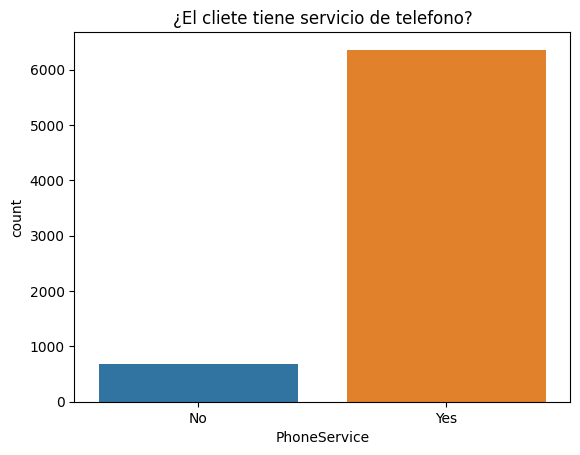

In [12]:
plt.figure()
sns.countplot(data =df, x= "PhoneService")
plt.title("¿El cliete tiene servicio de telefono?")

Text(0.5, 1.0, '¿El cliente tiene varios servicios o no?')

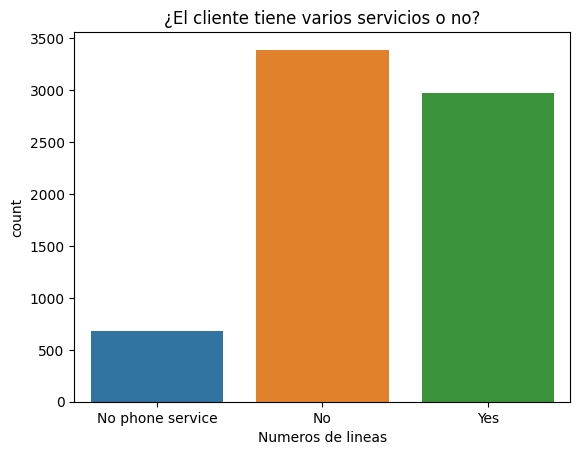

In [13]:
plt.figure()
sns.countplot(data=df, x="MultipleLines")
plt.xlabel("Numeros de lineas")
plt.title("¿El cliente tiene varios servicios o no?")

Text(0.5, 1.0, '¿Que tipo de servicio de internet tiene el cliente?')

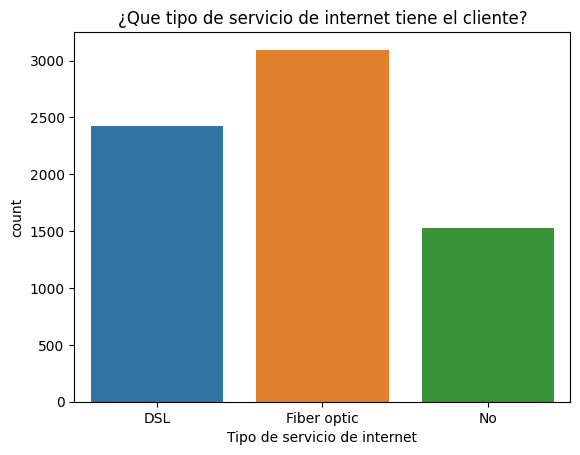

In [14]:
plt.figure()
sns.countplot(data=df, x= "InternetService")
plt.xlabel("Tipo de servicio de internet")
plt.title("¿Que tipo de servicio de internet tiene el cliente?")

Text(0.5, 1.0, '¿El cliente cuenta con seguridad en linea?')

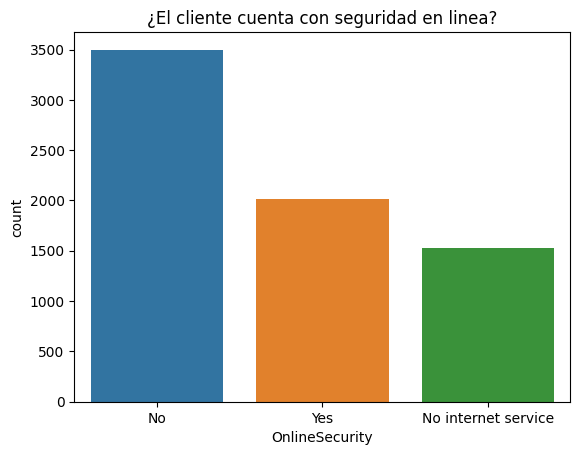

In [15]:
plt.figure()
sns.countplot(data=df,x="OnlineSecurity")
plt.title("¿El cliente cuenta con seguridad en linea?")

Text(0.5, 1.0, '¿El cliente tiene respaldo en linea?')

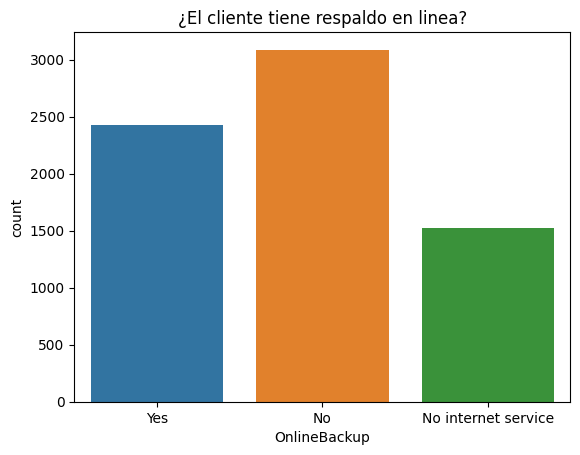

In [16]:
plt.figure()
sns.countplot(data=df, x= "OnlineBackup")
plt.title("¿El cliente tiene respaldo en linea?")

Text(0.5, 1.0, '¿El cliente cuenta con protección en su dispositivo?')

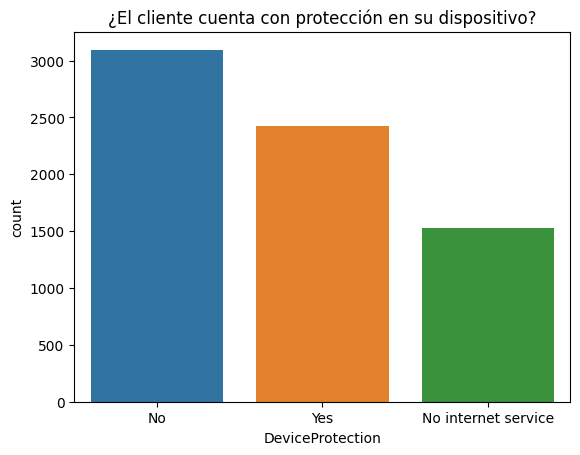

In [17]:
plt.figure()
sns.countplot(data=df,x="DeviceProtection")
plt.title("¿El cliente cuenta con protección en su dispositivo?")

Text(0.5, 1.0, '¿El cliente cuenta con soporte técnico')

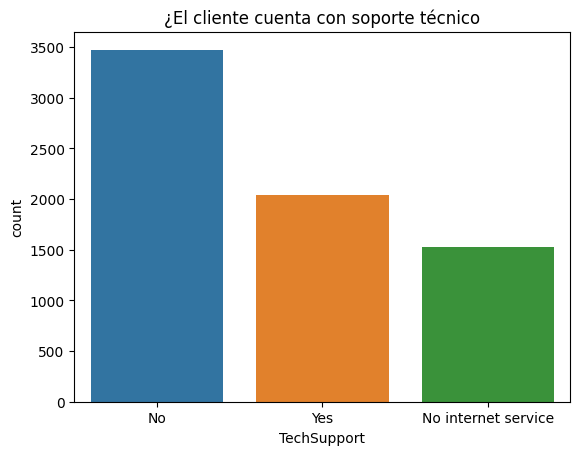

In [18]:
plt.figure()
sns.countplot(data=df,x="TechSupport")
plt.title("¿El cliente cuenta con soporte técnico")

<Axes: xlabel='StreamingTV', ylabel='count'>

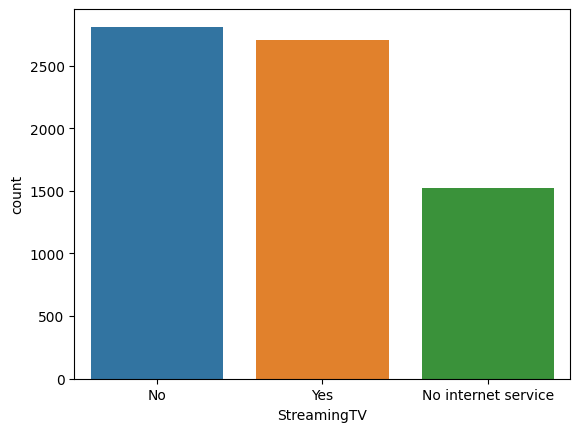

In [19]:
plt.figure()
sns.countplot(data= df,x = "StreamingTV")

Text(0.5, 1.0, '¿El usuario cuenta con streaming movies?')

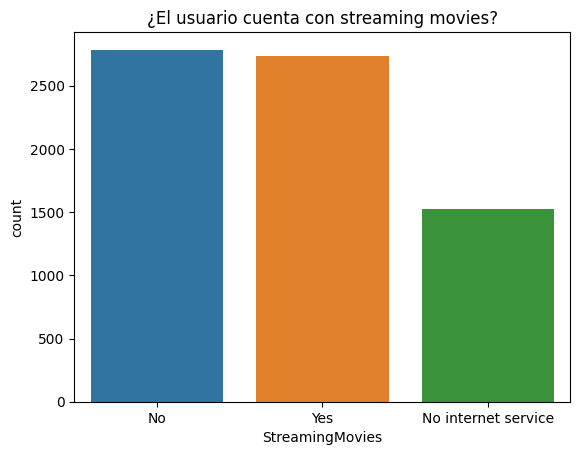

In [20]:
plt.figure()
sns.countplot(data=df,x="StreamingMovies")
plt.title("¿El usuario cuenta con streaming movies?")

Text(0.5, 1.0, 'Tipo de contrato del cliente')

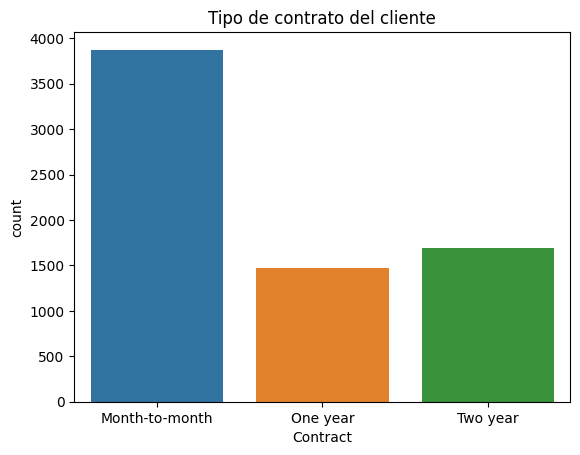

In [21]:
plt.figure()
sns.countplot(data=df,x="Contract")
plt.title("Tipo de contrato del cliente")

Text(0.5, 1.0, 'Cliente tiene facturación electronica')

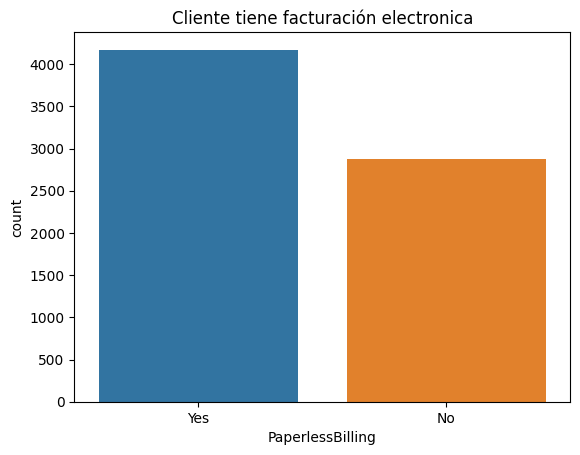

In [22]:
plt.figure()
sns.countplot(data=df,x="PaperlessBilling")
plt.title("Cliente tiene facturación electronica")

Text(0.5, 1.0, 'Metodo de pago del cliente')

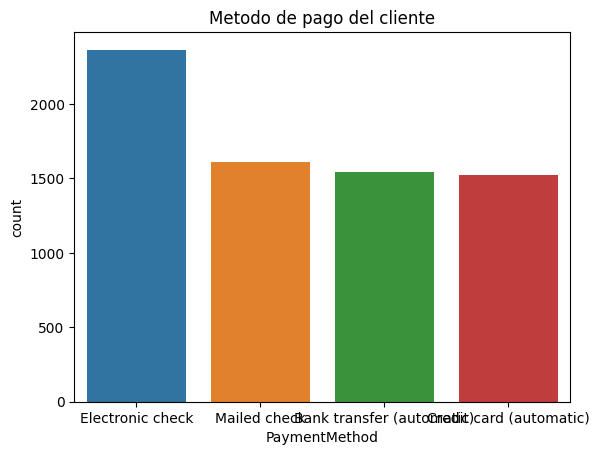

In [23]:
plt.figure()
sns.countplot(data=df,x="PaymentMethod")
plt.title("Metodo de pago del cliente")

Text(0.5, 1.0, 'Monto mensual de los clientes por el servicio')

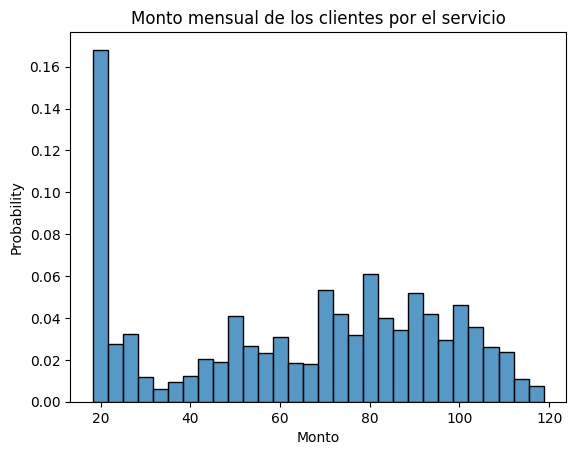

In [24]:
plt.figure()
sns.histplot(data=df, x="MonthlyCharges",
             bins=30, stat = "probability")
plt.xlabel("Monto")
plt.title("Monto mensual de los clientes por el servicio")

In [25]:
df["TotalCharges"].sort_values(ascending=False)

2845     999.9
3353     999.8
3686    999.45
5598     998.1
6646    997.75
         ...  
936           
753           
1340          
4380          
6754          
Name: TotalCharges, Length: 7043, dtype: object

In [26]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

ValueError: ignored

**Se observa que no se puede transformar la columna a flotante, debido a que existe " ", así lo que haremos sera transformar espacio en blanco en NaN y lo eliminaremos o imputaremos**

In [27]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",pd.NA)

In [28]:
#Eliminamos las filas ya que son 11, no representan un riesgo para que ocurra un sesgo
df.dropna(axis=0,inplace=True)

In [29]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Observamos que ya no habrìa inconvenientes para transformar de datos Object a flotante**

In [30]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

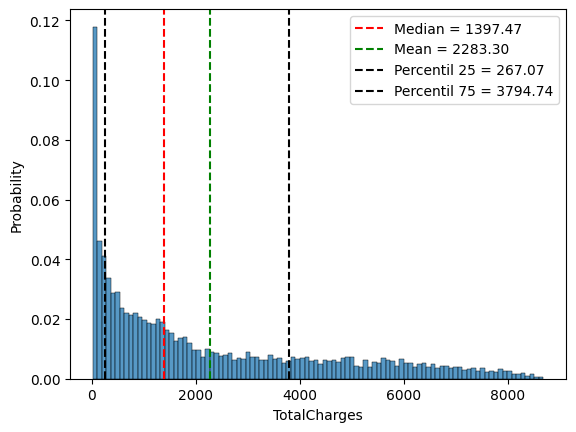

In [31]:
plt.figure()
sns.histplot(data=df,x="TotalCharges",
             stat="probability",bins =100)
#Calcular metricas
md=df["TotalCharges"].median()
mn=df["TotalCharges"].mean()
p25=df["TotalCharges"].quantile(0.2)
p75=df["TotalCharges"].quantile(0.75)
#Rectas Verticales
plt.axvline(md,color="red",linestyle="dashed",label=f'Median = {md:.2f}')
plt.axvline(mn,color="green",linestyle="dashed",label=f'Mean = {mn:.2f}')
plt.axvline(p25,color="black",linestyle="dashed",label=f'Percentil 25 = {p25:.2f}')
plt.axvline(p75,color="black",linestyle="dashed",label=f'Percentil 75 = {p75:.2f}')
plt.legend()

In [32]:
df["Churn"].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Text(0.5, 1.0, '¿El cliente fugo de la empresa?')

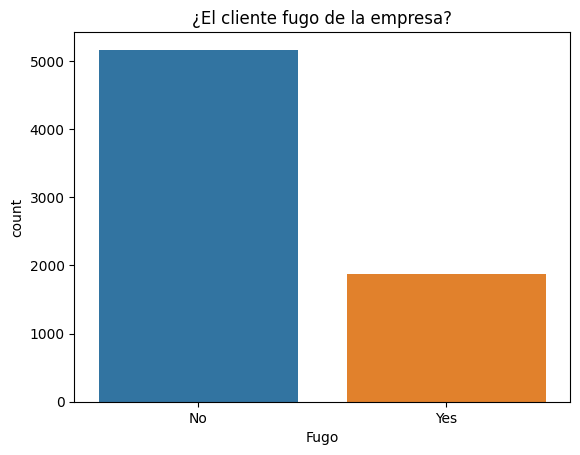

In [33]:
plt.figure()
sns.countplot(data=df, x="Churn")
plt.xlabel("Fugo")
plt.title("¿El cliente fugo de la empresa?")

#Conclusiones del análisis univariado

* Se observa que por cuantía, los clientes que conforman Telco son solteros.
* Los clientes en su mayoría(75%) no cuentan con hijos o dependientes.
* La cartera  se concentran en los nuevos clientes teniendo menos de 3 meses, siendo esto un problema para la empresa Telco, sin embargo, el segundo grupo son los más antiguos y fieles teniendo más de 70 meses en la empresa.
* Más del 80% de los clientes poseen el servicio de telefono. Además, una gran parte de estos cerca del 45% cuentan con multiple servicios de telefono.
* Cerca del 20% de los clientes no cuenta con internet,por otro lado, el servicio de internet se divide entre dsl y fibra optica siendo esta ultima la que más clientes posee,y el servicio de seguridad en linea y protección en su dispostivoen su mayoria no ha sido contratado, solo un 28% de los clientes, agregando a esto cerca de 45% no posee respaldo en linea, solo el 30% sí,más del 50% no cuenta con soporte tecnico.
* Un 50 % de los que poseen internet cuentan con servicio de streaming TV y Movies.
* El tipo de contrato de la mayoria de clientes es de mes a mes (50%), posteriormente 2 años y 1 año.
* Más del 60% de los clientes posee facturación electronica, siendo de los metodos de pagos más usados el cheque electrónico,y el resto tiene el mismo uso.
* El monto mensual que tienen los clientes es aproximado 25 dólares siendo el 17% de los clientes que es la tarifa más baja, un dato muy importante es que en el registro de el importe total cobrado al cliente se concentran en menos de $200 esto es debido al efecto que los clientes sean relativamente nuevos, es por ello, que es de suma prioridad realizar el modelo para evitar que más clientes fuguen.
* Cerca del 30% de los clientes en este registro han logrado fugarse.

#**Análisis Bivariado**

En este análisis describirá más las caracteristicas del target "Churn"

**Gender vs Churn**

Text(0.5, 1.0, '')

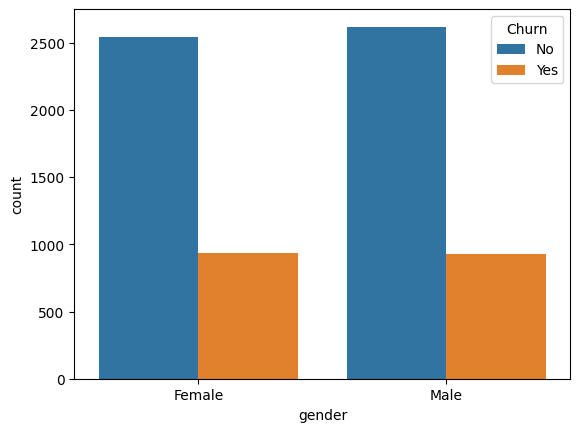

In [34]:
plt.figure()
sns.countplot(data=df,x="gender",hue="Churn")
plt.title("")

Se puede observar que la variable genero no es relevante en la variable Fuga,por ende,el motivo que el cliente sea hombre o mujer no determina o incrementa la posibilidad que se fugue.

**SeniorCitizen vs Churn**

Text(0.5, 1.0, 'Estado civil y estado de cliente ')

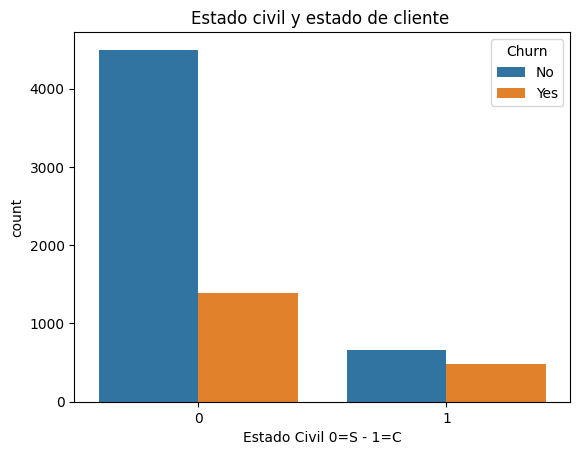

In [35]:
plt.figure()
sns.countplot(data=df,x="SeniorCitizen",hue="Churn")
plt.xlabel("Estado Civil 0=S - 1=C")
plt.title("Estado civil y estado de cliente ")

**Partner vs Churn**

Text(0.5, 1.0, 'Clientes de la tercera edad - Fuga ')

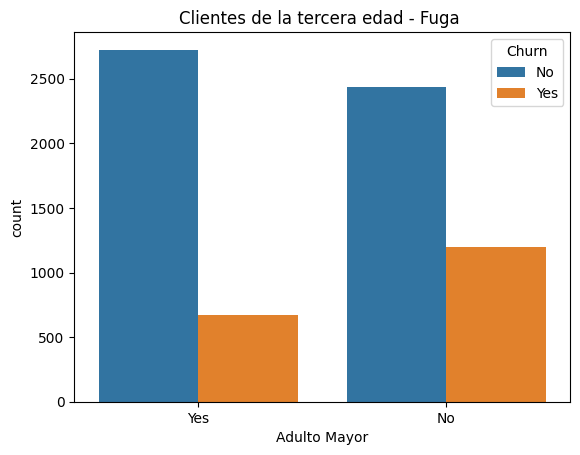

In [36]:
plt.figure()
sns.countplot(data=df,x="Partner",hue="Churn")
plt.xlabel("Adulto Mayor")
plt.title("Clientes de la tercera edad - Fuga ")

**Dependents VS Churn**

Text(0.5, 1.0, 'Dependientes y estado de cliente ')

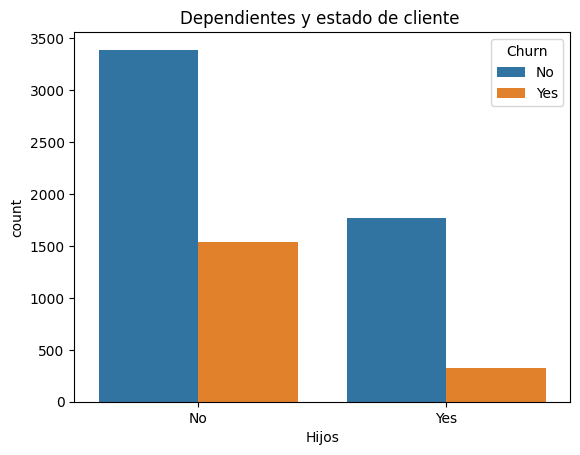

In [37]:
plt.figure()
sns.countplot(data=df,x="Dependents",hue="Churn")
plt.xlabel("Hijos")
plt.title("Dependientes y estado de cliente ")

**Tenure vs Churn**

Text(0.5, 1.0, 'Cantidad de meses de los clientes que fugaron y no')

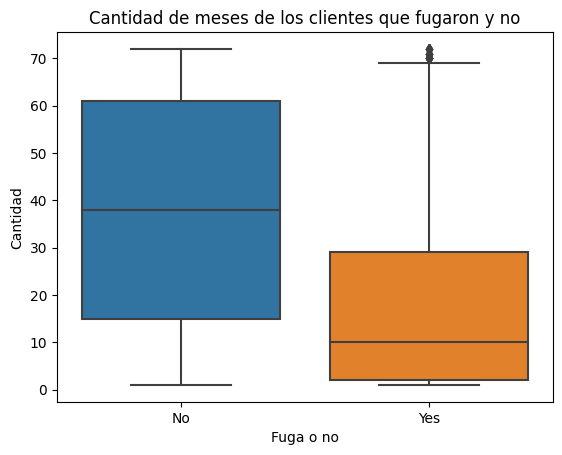

In [38]:
plt.figure()
sns.boxplot(data=df,x="Churn",y = "tenure")
plt.xlabel("Fuga o no")
plt.ylabel("Cantidad")
plt.title("Cantidad de meses de los clientes que fugaron y no")

**Phone Services vs Churn**

<Axes: xlabel='PhoneService', ylabel='count'>

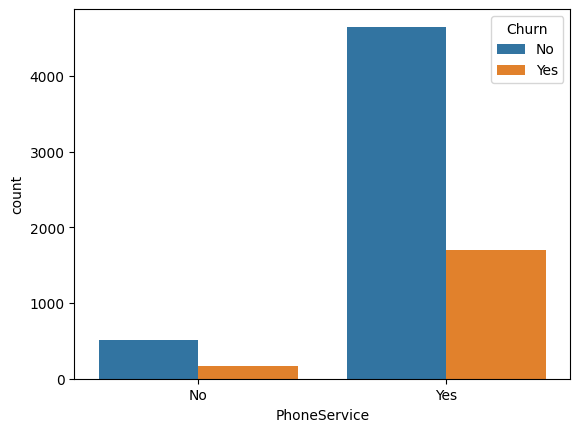

In [39]:
plt.figure()
sns.countplot(data=df,x="PhoneService", hue="Churn")

**MultipleLines vs Churn**

<Axes: xlabel='MultipleLines', ylabel='count'>

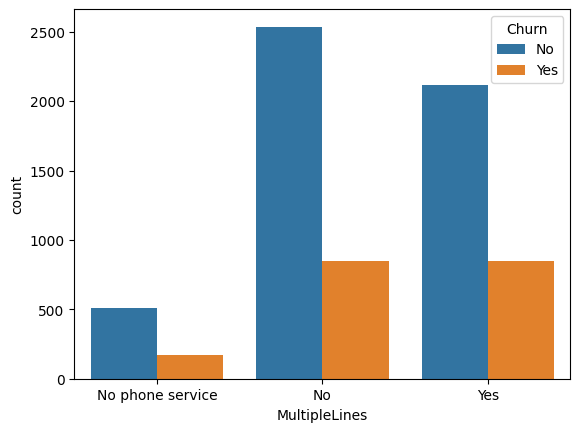

In [40]:
plt.figure()
sns.countplot(data=df,x="MultipleLines", hue="Churn")

**InternetServices vs Churn**

<Axes: xlabel='InternetService', ylabel='count'>

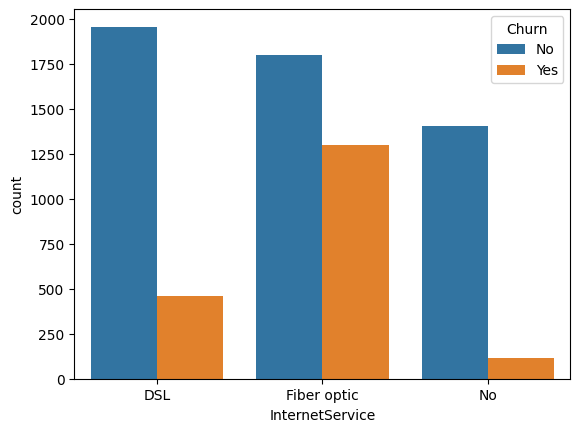

In [41]:
plt.figure()
sns.countplot(data=df,x="InternetService", hue="Churn")

**OnlineSecurity vs Churn**

<Axes: xlabel='OnlineSecurity', ylabel='count'>

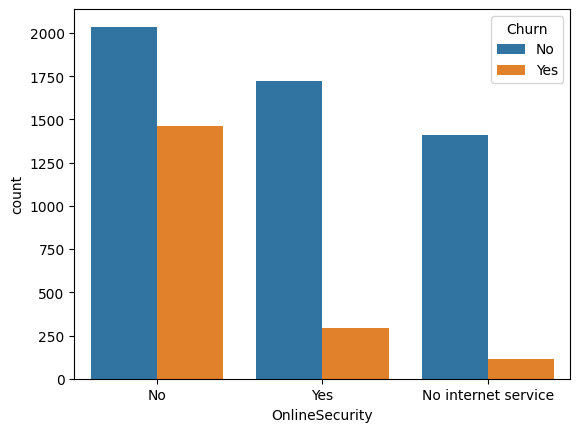

In [42]:
plt.figure()
sns.countplot(data=df,x="OnlineSecurity", hue="Churn")

**OnlineBackup vs Churn**

<Axes: xlabel='OnlineBackup', ylabel='count'>

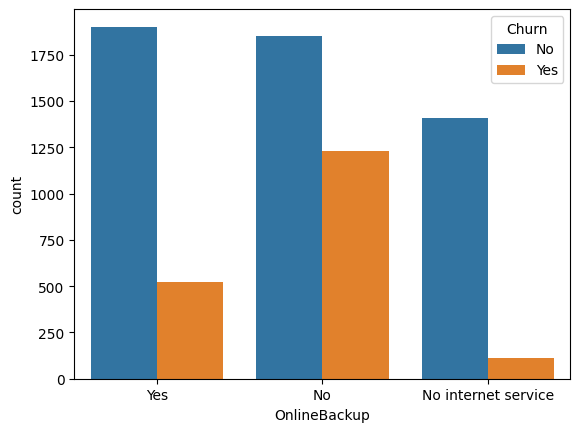

In [43]:
plt.figure()
sns.countplot(data=df,x="OnlineBackup", hue="Churn")

**DeviceProtection vs Churn**

<Axes: xlabel='DeviceProtection', ylabel='count'>

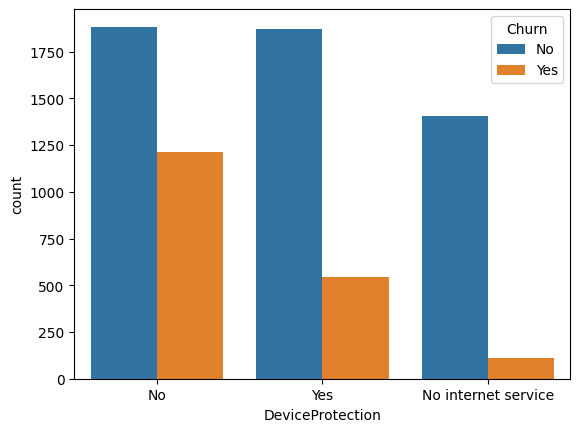

In [44]:
plt.figure()
sns.countplot(data=df,x="DeviceProtection", hue="Churn")

**TechSupport vs Churn**

<Axes: xlabel='TechSupport', ylabel='count'>

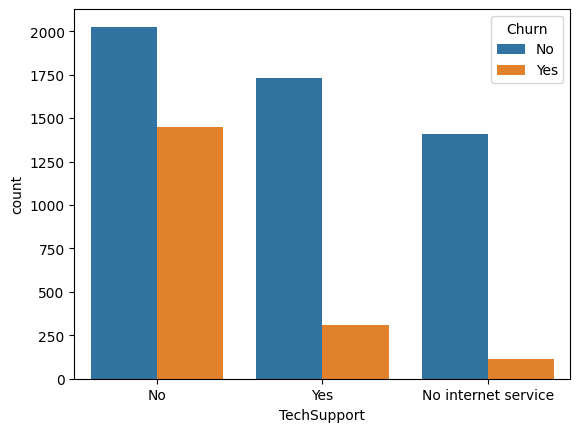

In [45]:
plt.figure()
sns.countplot(data=df,x="TechSupport", hue="Churn")

**Streaming TV vs Churn**

<Axes: xlabel='StreamingTV', ylabel='count'>

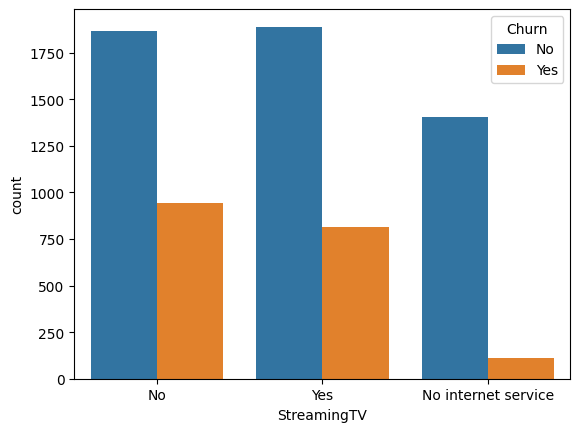

In [46]:
plt.figure()
sns.countplot(data=df,x="StreamingTV", hue="Churn")

**StreamingMovie vs Churn**

<Axes: xlabel='StreamingMovies', ylabel='count'>

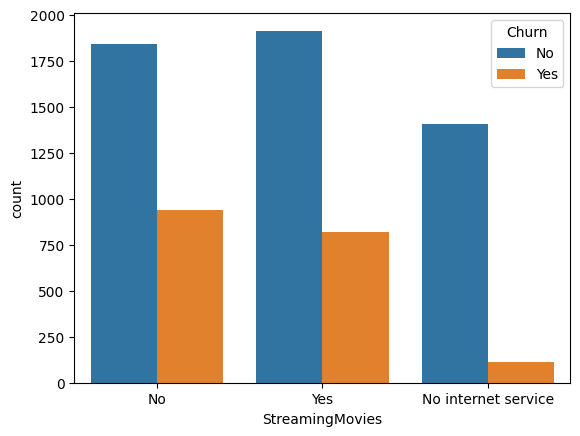

In [47]:
plt.figure()
sns.countplot(data=df,x="StreamingMovies", hue="Churn")

**Contract vs Churn**

<Axes: xlabel='Contract', ylabel='count'>

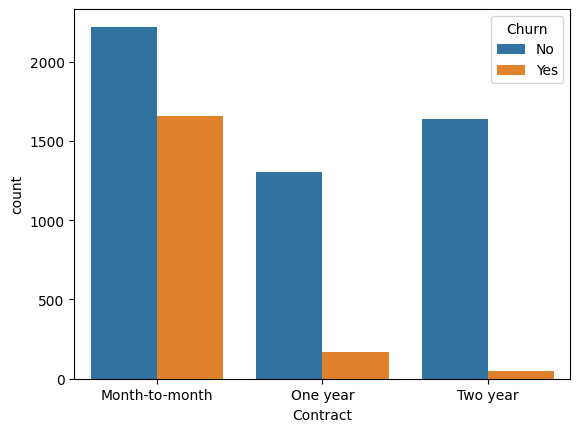

In [48]:
plt.figure()
sns.countplot(data=df,x="Contract", hue="Churn")

**PaperlessBilling vs Churn**

<Axes: xlabel='PaperlessBilling', ylabel='count'>

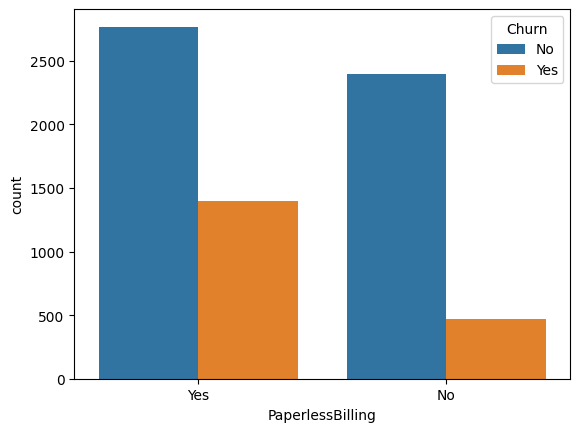

In [49]:
plt.figure()
sns.countplot(data=df,x="PaperlessBilling", hue="Churn")

**PaymentMethod vs Churn**

<Axes: xlabel='PaymentMethod', ylabel='count'>

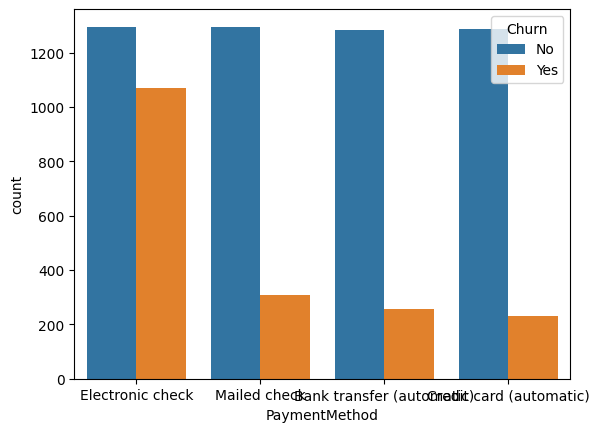

In [50]:
plt.figure()
sns.countplot(data=df,x="PaymentMethod", hue="Churn")

**MonthlyCharges vs Churn**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

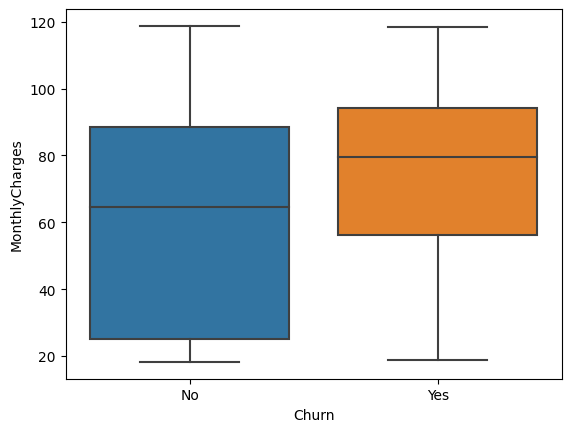

In [51]:
plt.figure()
sns.boxplot(data=df,x="Churn",y="MonthlyCharges")

**TotalCharges vs Churn**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

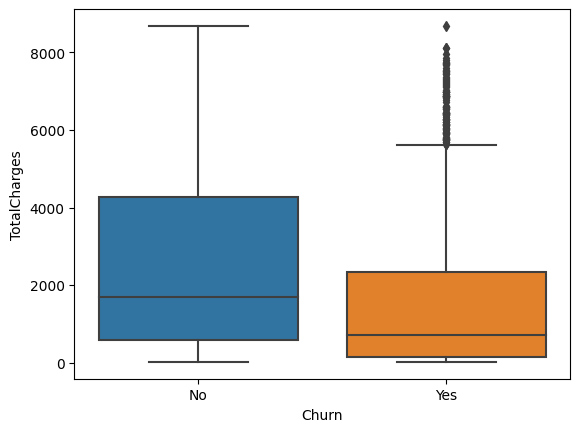

In [52]:
plt.figure()
sns.boxplot(data=df,x="Churn",y="TotalCharges")

**InternetService vs MonthlyCharges**

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

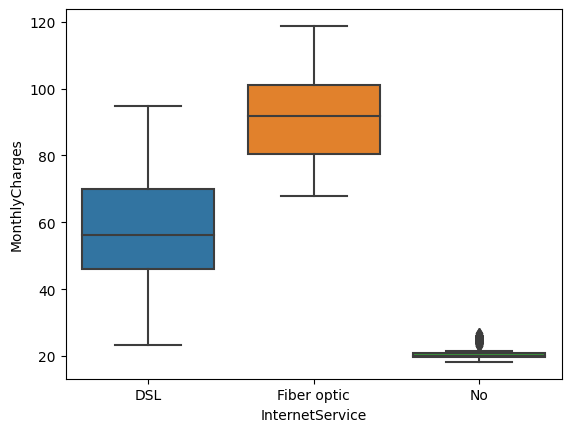

In [53]:
plt.figure()
sns.boxplot(data=df,x="InternetService",y="MonthlyCharges")

# Conclusiones análisis bivariado:

* Se puede observar que en proporción un cliente casado esta más predispuesto a fugarse que un cliente soltero.
* Los clientes que no son adultos mayores, son más propensos a fugarse a diferencia de los que sí son de las tercera edad.
* Los clientes que no cuentan con ningún hijo o dependiente suelen tener más posibilidades de fugarse de la empresa de los que sí tienen.
* Una caracteristica muy representativa de los que fugan un 25% se quedan menos de 3 meses y es que no permanecen mucho tiempo en la empresa, el 50% esta menos de 10 meses y el 75% esta cerca de 2 años y medio, lo más fundamental es crear una buena experiencia al usuario dentro del año y más crucial dentro de los primeros 3 meses.
* El servicio de telefono cuenta con un gran porcentaje cerca del 25% de fuga, por ende se tendría que evaluar por cual sería el motivo de fuga con este servicio, sin embargo, el que tenga multiples lineas o no, no determina si es fuga, ya en ambos tienen la misma cantidad.
* Con lo que es respecto al servicio de internet hay más clientes fugas en fibra optico esto es debido a alto costo que ronda de 70 a 120 dólares a comparación del DSL que es de 25 a 90 dólares sin contar la infraestructura que necesita, por otro lado, los que no cuentan seguridad en linea tienden a fugarse si comparamos con los que sí, por ello que sería recomendable realizar promociones o paquetes de oferta en seguridad en linea, respaldo en linea, protección de dispositivos y , debido a posibles consecuencias de hacking, de igual forma en lo que es servicio de respaldo en línea y protección de dispositivos.
* Un dato muy importante es que los contratos que son mes a mes son los que más fugas hay, a comparación del año y dos años. Es por ello que hay que hacer muy atractivo los contratos de mayor tiempo o reemplazar la modalidad de mes a mes a 3 meses o 6 meses con beneficios.
* Una caracteristica es que tienen facturación electronica suelen tener más posibilidades de fugar,además que el método de pago con más probabilidades de fuga es el cheque electronico que representa 4 veces más que el cheque por correo,transferencia bancaria o Credit CArd.
* Los importes mensuales más altos son por lo general los que estan más predispuesto a fugarse que rondan alrededor del 50 a 90 dólares, como consecuencia la vida util del cliente en la empresa termina muy pronto que al final gasta menos de 800 dólares.

# **Recomendaciones**

* Segmentación y Campañas Específicas: Dado que un gran número de clientes son solteros y sin hijos, se deben diseñar campañas de marketing y ofertas específicas para este segmento.

* Programas de Lealtad y Retención: Implementar programas de lealtad para retener a los nuevos clientes, especialmente durante sus primeros meses, y recompensar a los clientes más antiguos por su fidelidad.

* Revisión de Precios y Servicios de Internet: Considerar ajustar los precios de la fibra óptica y ofrecer promociones iniciales para hacerla más atractiva. Además, promover la adopción de servicios adicionales como seguridad en línea, respaldo y soporte técnico mediante descuentos o paquetes combinados.

* Flexibilización de Contratos: Evaluar la posibilidad de ofrecer contratos de duración intermedia (por ejemplo, 3 o 6 meses) con beneficios adicionales para retener a más clientes y hacer más atractivos los contratos de mayor duración.

* Facilitación de Métodos de Pago: Diversificar y facilitar más opciones de métodos de pago, y promover alternativas al cheque electrónico, que muestra una correlación con una mayor tasa de fuga.

* Investigación de Motivos de Fuga: Realizar encuestas de satisfacción y grupos focales para entender las razones específicas por las cuales los clientes abandonan, en especial aquellos con servicio de teléfono y aquellos con contratos de corta duración.

* Promoción de Servicios de Valor Agregado: Realizar campañas educativas y promocionales sobre los beneficios de contar con servicios adicionales como seguridad en línea, respaldo y protección de dispositivos.

* Estrategias para Jóvenes y Sin Dependientes: Diseñar estrategias específicas para retener a clientes más jóvenes y sin hijos, que muestran una mayor propensión a abandonar el servicio.

* Revisión de Modalidades de Facturación: Aunque la facturación electrónica es conveniente, puede ser útil promover otros métodos de facturación y entender por qué esta modalidad tiene correlación con una mayor tasa de fuga.

* Enfoque en la Experiencia del Usuario: Dado que muchos clientes abandonan en los primeros meses, es esencial ofrecer una excelente experiencia desde el inicio, con onboarding efectivo, soporte al cliente proactivo y beneficios iniciales.

#**Feature Engineering** ML1

In [54]:
# hemos creado una columna con los valores 0 y 1, si es 1 el cliente al menos cuenta con un  servicio de streaming
# y si es 0 no cuenta con ninguno

df["Streaming"] = (~(df['StreamingTV'] == 'No') | ~(df['StreamingMovies'] == 'No')).astype(int)


<Axes: xlabel='Streaming', ylabel='count'>

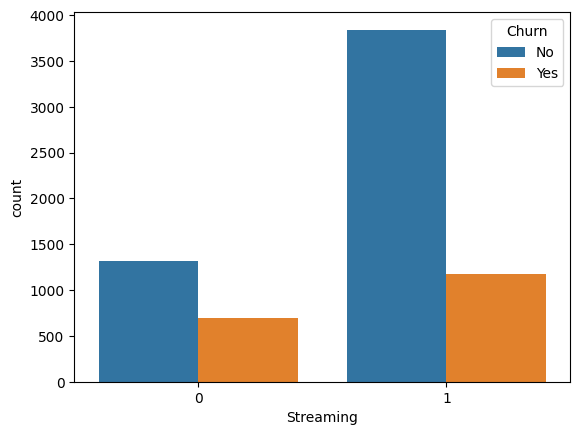

In [55]:
plt.figure()
sns.countplot(data=df,x="Streaming",hue="Churn")

In [56]:
# Se creara una nueva columna que va a realizar una metrica si el cliente es de "alto valor" o si es sensible a los precios
df["Valor_servicio"] = (df["TotalCharges"]/df["tenure"])

<Axes: xlabel='Churn', ylabel='Valor_servicio'>

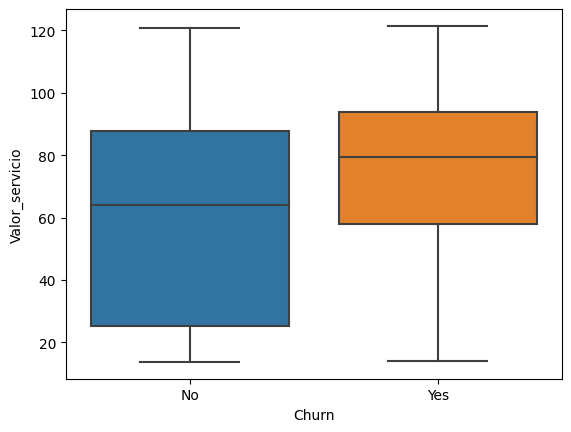

In [57]:
plt.figure()
sns.boxplot(data=df, x="Churn",y="Valor_servicio")

**observemos que los clientes que no se fugan estan más disperos entre 30 y 85 puntos de la metrica de valor, en cambio los que si fugaron estan menos dispersos y más  concentrados entre 55 y 90 pp (rango mayor a los que no fugan), esto quiere decir que los clientes que fugan por lo general son clientes con menor tiempo y con planes mucho más costosos, es decir, que el poco tiempo que estan con el servicio de la empresa tienden a fugarse porque la percepción de valor de servicio es menor al costo que pagan**

In [58]:
# creamos una variable de servicios adicionales contrata
servicios_adicionales = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['servicios_adicionales'] = df[servicios_adicionales].apply(lambda row: sum(row == 'Yes'), axis=1)

<Axes: xlabel='servicios_adicionales', ylabel='count'>

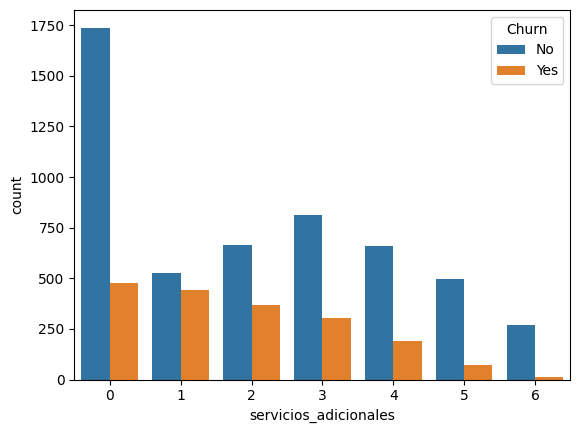

In [59]:
plt.figure()
sns.countplot(data=df,x="servicios_adicionales",hue="Churn")

**Vemos una clara relación en la cual, mientras más servicios adicionales adquiere el cliente menos probabilidades tiene para fugarse**

In [60]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, "No internet service":2})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0,"No internet service":2})

In [61]:
df["Tech_Security"] = df["OnlineSecurity"]*df["TechSupport"]

In [62]:
df["Tech_Security"]

0       0
1       0
2       0
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    0
7042    1
Name: Tech_Security, Length: 7032, dtype: int64

**Como OnlineSecurity y TechSupport tienen casi la misma relación con el target Churn, se va a poner en una sola variable**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   SeniorCitizen          7032 non-null   int64  
 2   Partner                7032 non-null   object 
 3   Dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   PhoneService           7032 non-null   object 
 6   MultipleLines          7032 non-null   object 
 7   InternetService        7032 non-null   object 
 8   OnlineSecurity         7032 non-null   int64  
 9   OnlineBackup           7032 non-null   object 
 10  DeviceProtection       7032 non-null   object 
 11  TechSupport            7032 non-null   int64  
 12  StreamingTV            7032 non-null   object 
 13  StreamingMovies        7032 non-null   object 
 14  Contract               7032 non-null   object 
 15  Pape

In [64]:
df["Churn"] = df["Churn"].map({"Yes":1,"No":0})

División de la data

In [65]:
X = df.drop(["Churn","StreamingTV","StreamingMovies","TechSupport","OnlineSecurity","gender"],axis=1)
y = df["Churn"]

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

#Modelamiento ML1

In [68]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<Figure size 1000x600 with 0 Axes>

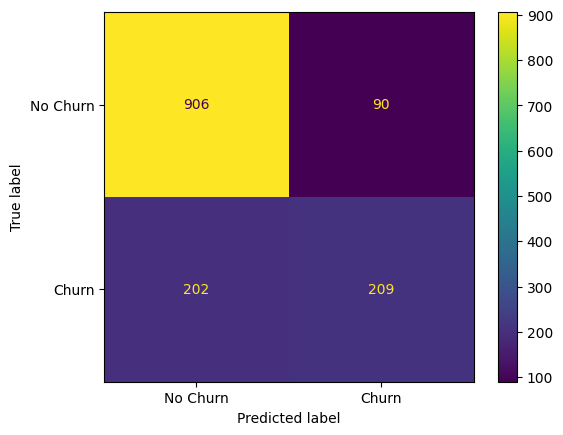

In [69]:
# Graficar la matriz de confusión
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=['No Churn', 'Churn'])
plt.show()

In [70]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       996
           1       0.70      0.51      0.59       411

    accuracy                           0.79      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



#Feature Engineering ML2

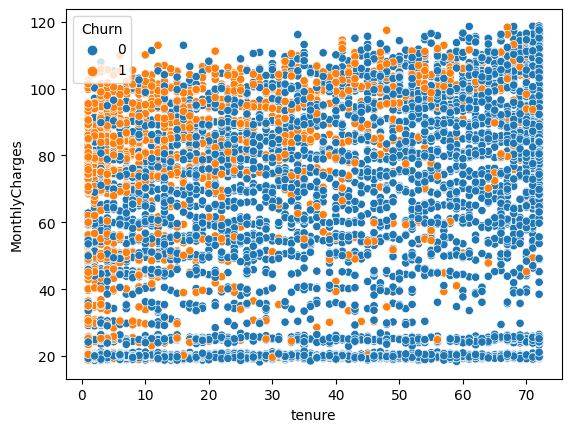

In [71]:
# Asegúrate de que pasas el DataFrame a sns.scatterplot
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn")
plt.show()


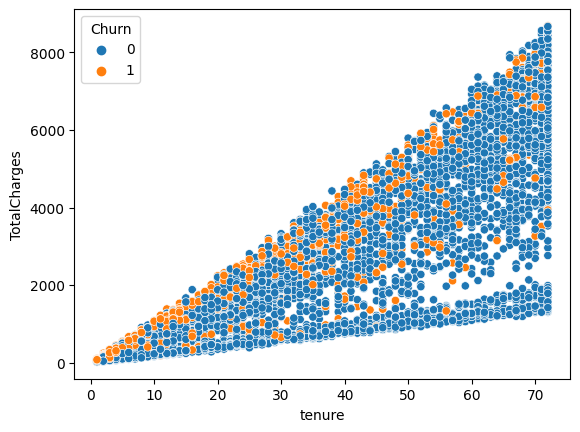

In [72]:
# Asegúrate de que pasas el DataFrame a sns.scatterplot
sns.scatterplot(data=df, x="tenure", y="TotalCharges", hue="Churn")
plt.show()


**Se observa que la mayor concentración de clientes de fuga estan de 60 meses a menos, por ello se va a filtrar todos los clientes que esten menos de 60 meses a pesar que se va a perder datos pero es mayormente de clientes que no fugan,como consecuencia le damos más proporción y peso a los clientes que fugan para que pueda identificar mejor a este sector**

In [73]:
df2 = df[df["tenure"]<60]

In [74]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming,Valor_servicio,servicios_adicionales,Tech_Security
0,Female,0,Yes,No,1,No,No phone service,DSL,0,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,29.850000,1,0
1,Male,0,No,No,34,Yes,No,DSL,1,No,...,One year,No,Mailed check,56.95,1889.50,0,0,55.573529,2,0
2,Male,0,No,No,2,Yes,No,DSL,1,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,54.075000,2,0
3,Male,0,No,No,45,No,No phone service,DSL,1,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,40.905556,3,1
4,Female,0,No,No,2,Yes,No,Fiber optic,0,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,75.825000,0,0


In [75]:
# si decido solamente quitar Churn los FP aumentan 10, es decir, el modelo clasifica peor.
X = df.drop(["Churn"],axis=1)
y = df["Churn"]

#Modelamiento ML2
Se estan quedado las mismas variables creadas del feature engineering ML1 y la filtración de tenure < 60 meses

**División de la data**

In [76]:
X = df2.drop(["Churn"],axis=1)
y = df2["Churn"]

In [77]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [78]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<Figure size 1000x600 with 0 Axes>

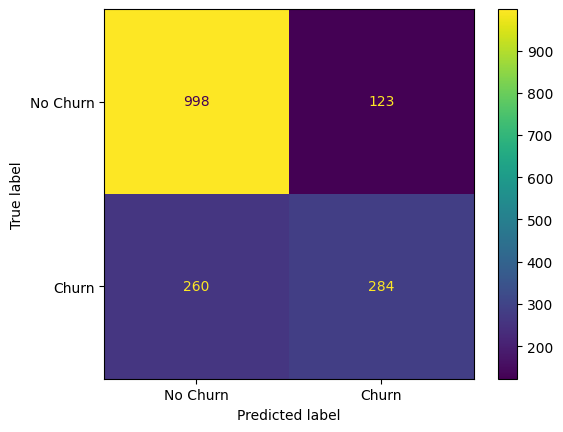

In [79]:
# Graficar la matriz de confusión
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=['No Churn', 'Churn'])
plt.show()

In [80]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1121
           1       0.70      0.52      0.60       544

    accuracy                           0.77      1665
   macro avg       0.75      0.71      0.72      1665
weighted avg       0.76      0.77      0.76      1665



**Escalar ML2**

In [81]:
from sklearn.model_selection import cross_val_score # Para realizar validación cruzada, para evaluar el rendimiento del modelo que consiste en dividir los datos en particiones, entranando y evaluadno el modelo en diferentes combinaciones de estas particiones.
from sklearn.model_selection import GridSearchCV # Permite buscar los mejores hiperparametros del modelo y realiza una validación cruzada
from sklearn.utils.class_weight import compute_class_weight # Calcula automaticamente los pesos de clase en problema de clasificación desequilibrio
from sklearn.preprocessing import MinMaxScaler # Se utiliza para escalar los datos en un rango especifico.

In [82]:
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc

array([[0.        , 0.        , 1.        , ..., 0.86643276, 0.83333333,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.78021883, 0.5       ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.65396856, 0.33333333,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.02801027, 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.06918788, 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.67008849, 0.33333333,
        0.        ]])

In [83]:
X_test_sc = scaler.fit_transform(X_test)
X_test_sc

array([[0.        , 0.        , 1.        , ..., 0.33388534, 0.16666667,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.85628543, 0.66666667,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.61201798, 0.66666667,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.26857954, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.55841698, 0.16666667,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.82360562, 0.66666667,
        0.        ]])

In [84]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [85]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000000000),
    'SGD Classifier': SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=10000000)
}
models

{'Logistic Regression': LogisticRegression(max_iter=10000000000),
 'SGD Classifier': SGDClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB': MultinomialNB(),
 'KNeighbors': KNeighborsClassifier(),
 'Neural Network': MLPClassifier(max_iter=10000000)}

In [86]:

# Para proporcionar una información detallada en precisión y rendimiento de los modelos se necesita
from sklearn.metrics import classification_report


In [87]:
for key,model in models.items():
    model.fit(X_train_sc,y_train)
    predictions = model.predict(X_test_sc)
    print('Reporte de clasificación',key)
    print(classification_report(y_test,predictions,zero_division = 0))

Reporte de clasificación Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1121
           1       0.69      0.55      0.61       544

    accuracy                           0.77      1665
   macro avg       0.74      0.72      0.73      1665
weighted avg       0.76      0.77      0.76      1665

Reporte de clasificación SGD Classifier
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1121
           1       0.67      0.57      0.62       544

    accuracy                           0.77      1665
   macro avg       0.74      0.72      0.73      1665
weighted avg       0.76      0.77      0.76      1665

Reporte de clasificación Random Forest
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1121
           1       0.68      0.48      0.56       544

    accuracy                           0.76      1665
   m

**Tenemos 2 metricas:**

Se tiene que establecer cual va hacer la estrategia primordial del modelo, en este caso como capturar un cliente nuevo cuesta 7 veces más que retener un cliente que va a fugar se

* Precisión: Minimizar los falsos que fugan
* Recall: Maximizar la predicción de la cantidad de personas que fugan

EL indicador de acuerdo al objetivo sera SGD Classifier, GaussianNB.



SG

#Feature Engineering ML3

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   SeniorCitizen          7032 non-null   int64  
 2   Partner                7032 non-null   object 
 3   Dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   PhoneService           7032 non-null   object 
 6   MultipleLines          7032 non-null   object 
 7   InternetService        7032 non-null   object 
 8   OnlineSecurity         7032 non-null   int64  
 9   OnlineBackup           7032 non-null   object 
 10  DeviceProtection       7032 non-null   object 
 11  TechSupport            7032 non-null   int64  
 12  StreamingTV            7032 non-null   object 
 13  StreamingMovies        7032 non-null   object 
 14  Contract               7032 non-null   object 
 15  Pape

**DATA LEAKAGE(FUGA DE DATOS**

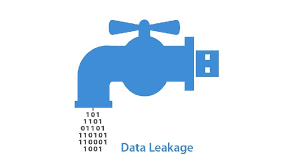

La fuga de datos (data leakage) en el contexto del aprendizaje automático ocurre cuando información del conjunto de datos de prueba se utiliza de manera inapropiada durante el entrenamiento del modelo. Esto puede llevar a una evaluación excesivamente optimista del rendimiento del modelo, ya que el modelo tendría "conocimientos" sobre los datos de prueba que no debería tener. En el contexto del target encoding, la fuga de datos puede manifestarse de varias maneras:


Inclusión de datos de prueba en el cálculo del encoding:
Si el target encoding se calcula utilizando todo el conjunto de datos, incluyendo los datos de prueba, entonces la información del target de los datos de prueba "se filtra" de vuelta al conjunto de entrenamiento. Esto significa que el modelo puede hacer trampa, por así decirlo, porque tiene acceso a información sobre el target que no debería tener durante el entrenamiento.

Target encoding basado en todo el dataset:
Incluso si los datos de prueba no se utilizan directamente en el entrenamiento, el target encoding calculado sobre todo el dataset puede introducir sesgos, ya que las proporciones reflejarán la distribución general del target, incluyendo las observaciones de prueba.

Para evitar la fuga de datos al realizar target encoding, uno debe:

Separar estrictamente los conjuntos de entrenamiento y prueba:
Calcular el target encoding solo en el conjunto de entrenamiento y luego aplicar esas codificaciones al conjunto de prueba.

Usar técnicas de validación adecuadas:
Aplicar técnicas como la validación cruzada, donde el target encoding se recalcula para cada fold de manera que nunca se incluyan datos del fold de validación/prueba en el cálculo de los encodings.

Temporalidad:
En problemas de series temporales, asegurarse de que el target encoding se calcule de manera que refleje solo la información disponible hasta el punto de tiempo actual, sin incluir datos futuros.

In [98]:
gender_churn = df[["gender","Churn"]].groupby(by=("gender")).mean().reset_index()
gender_churn.rename(columns={"Churn":"gender_churn"},inplace=True)
df = df.merge(gender_churn,
              left_on = 'gender',
              right_on = 'gender',
              how = 'left')

No se puede utilizar de esta manera el target encoding, ya que al usar todo el conjunto de datos para calcular la media de 'Churn' por 'gender', estás incluyendo información del conjunto de prueba en tus características de entrenamiento. Esto significa que el modelo podría tener un rendimiento artificialmente inflado porque 've' datos durante el entrenamiento que deberían estar ocultos hasta la fase de prueba.

In [101]:
df.drop(["gender_churn"],axis=1, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   SeniorCitizen          7032 non-null   int64  
 2   Partner                7032 non-null   object 
 3   Dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   PhoneService           7032 non-null   object 
 6   MultipleLines          7032 non-null   object 
 7   InternetService        7032 non-null   object 
 8   OnlineSecurity         7032 non-null   int64  
 9   OnlineBackup           7032 non-null   object 
 10  DeviceProtection       7032 non-null   object 
 11  TechSupport            7032 non-null   int64  
 12  StreamingTV            7032 non-null   object 
 13  StreamingMovies        7032 non-null   object 
 14  Contract               7032 non-null   object 
 15  Pape

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [104]:
from sklearn.model_selection import KFold

# Suponiendo que X_train, y_train, X_test, y_test están definidos y que df es tu DataFrame completo

# Identificar las columnas categóricas
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Inicializar el KFold
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Diccionario para almacenar las codificaciones de entrenamiento
train_target_encodings = {col: np.zeros(X_train.shape[0]) for col in categorical_columns}

# Diccionario para almacenar las codificaciones de prueba
test_target_encodings = {}

# Calcular las codificaciones para cada fold
for train_index, val_index in kf.split(X_train):
    # Dividir los datos en subconjuntos de entrenamiento y validación
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]

    # Para cada columna categórica, calcular la media del target y aplicarla al conjunto de validación
    for col in categorical_columns:
        means = X_train_fold.groupby(col)[y_train.name].mean()
        train_target_encodings[col][val_index] = X_val_fold[col].map(means)

# Calcular las medias del target globales para cada categoría en el conjunto de entrenamiento
for col in categorical_columns:
    global_mean = X_train.groupby(col)[y_train.name].mean()
    test_target_encodings[col] = X_test[col].map(global_mean)

# Actualizar el X_train con las codificaciones calculadas
for col in categorical_columns:
    X_train[col] = train_target_encodings[col]

# Actualizar el X_test con las codificaciones calculadas
for col in categorical_columns:
    X_test[col] = test_target_encodings[col].fillna(global_mean.mean())


In [114]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Streaming,Valor_servicio,servicios_adicionales,Tech_Security
1262,0,0,1,0,12,1,0,0,0,2,...,0,0,1,2,51.25,612.10,0,51.008333,1,0
5722,0,1,1,0,27,1,2,1,1,0,...,2,0,1,0,104.30,2867.75,1,106.212963,4,1
5432,0,0,0,0,2,1,0,0,0,0,...,2,0,0,2,76.40,160.80,1,80.400000,4,0
1175,0,0,0,0,13,1,2,1,1,0,...,0,0,1,1,80.00,1029.35,0,79.180769,1,0
3636,0,0,0,1,11,1,0,2,2,1,...,1,0,0,1,19.70,216.20,1,19.654545,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,1,0,1,0,24,1,2,1,0,0,...,2,0,1,2,93.00,2248.05,1,93.668750,2,0
3895,1,0,1,1,56,1,2,2,2,1,...,1,2,0,0,24.15,1402.25,1,25.040179,0,4
6279,0,0,1,1,21,1,0,0,0,0,...,0,0,1,2,44.95,926.25,0,44.107143,0,0
1253,0,0,0,0,7,1,0,1,0,0,...,2,0,1,2,79.30,523.15,1,74.735714,1,0


In [116]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Solo transformar los datos de prueba con el mismo escalador
X_test_scaled = scaler.transform(X_test)


In [118]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creamos un pipeline que primero escala los datos y luego aplica SGD
pipeline_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=123))

# Entrenamos el modelo
pipeline_sgd.fit(X_train, y_train)

# Evaluamos el modelo
y_pred_sgd = pipeline_sgd.predict(X_test)

print(classification_report(y_test, y_pred_sgd))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1121
           1       0.65      0.52      0.58       544

    accuracy                           0.75      1665
   macro avg       0.72      0.69      0.70      1665
weighted avg       0.74      0.75      0.75      1665



In [131]:
from sklearn.model_selection import GridSearchCV

# Definir el pipeline con el SGDClassifier y el escalador
pipeline_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=123))

# Definir la grilla de parámetros a buscar
param_grid_sgd = {
    'sgdclassifier__loss': ['hinge', 'log', 'modified_huber'],
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet']
}

# Inicializar GridSearchCV
grid_search_sgd = GridSearchCV(pipeline_sgd, param_grid_sgd, cv=5, scoring='recall')

# Ajustar GridSearchCV
grid_search_sgd.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=123))]),
             param_grid={'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber'],
                         'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall')

In [123]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener el mejor modelo del proceso de GridSearchCV
best_sgd_model = grid_search_sgd.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_sgd = best_sgd_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Imprimir la matriz de confusión
print("Matriz de Confusión para SGDClassifier:")
print(conf_matrix_sgd)

# Imprimir un reporte de clasificación para obtener más detalles
print(classification_report(y_test, y_pred_sgd))


Matriz de Confusión para SGDClassifier:
[[975 146]
 [245 299]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1121
           1       0.67      0.55      0.60       544

    accuracy                           0.77      1665
   macro avg       0.74      0.71      0.72      1665
weighted avg       0.76      0.77      0.76      1665



In [127]:
from sklearn.naive_bayes import GaussianNB

# Inicializamos el clasificador Gaussian Naive Bayes
gnb = GaussianNB()

# Entrenamos el modelo
gnb.fit(X_train, y_train)

# Evaluamos el modelo
y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       0.88      0.63      0.73      1121
           1       0.52      0.83      0.64       544

    accuracy                           0.69      1665
   macro avg       0.70      0.73      0.69      1665
weighted avg       0.76      0.69      0.70      1665



In [132]:
# Definir la grilla de parámetros a buscar
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Inicializar el clasificador GaussianNB
gnb = GaussianNB()

# Inicializar GridSearchCV
grid_search_gnb = GridSearchCV(gnb, param_grid_gnb, cv=5, scoring='recall')

# Ajustar GridSearchCV
grid_search_gnb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall')

In [134]:
# Para SGDClassifier
print("Mejor conjunto de hiperparámetros para SGDClassifier:", grid_search_sgd.best_params_)
print("Mejor recall para SGDClassifier:", grid_search_sgd.best_score_)

# Para GaussianNB
print("Mejor conjunto de hiperparámetros para GaussianNB:", grid_search_gnb.best_params_)
print("Mejor recall para GaussianNB:", grid_search_gnb.best_score_)


Mejor conjunto de hiperparámetros para SGDClassifier: {'sgdclassifier__alpha': 0.0001, 'sgdclassifier__loss': 'modified_huber', 'sgdclassifier__penalty': 'elasticnet'}
Mejor score para SGDClassifier: 0.6184303965488634
Mejor conjunto de hiperparámetros para GaussianNB: {'var_smoothing': 1e-07}
Mejor score para GaussianNB: 0.8572623195619711


# Modelado y ajustes de hiperparametros

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

# Utilizar el mejor modelo de SGDClassifier para predecir el conjunto de prueba
best_sgd = grid_search_sgd.best_estimator_
y_pred_sgd = best_sgd.predict(X_test)

# Utilizar el mejor modelo de GaussianNB para predecir el conjunto de prueba
best_gnb = grid_search_gnb.best_estimator_
y_pred_gnb = best_gnb.predict(X_test)

# Matrices de confusión
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Reportes de clasificación
report_sgd = classification_report(y_test, y_pred_sgd)
report_gnb = classification_report(y_test, y_pred_gnb)

# Resultados SGDClassifier
print("SGDClassifier - Matriz de Confusión:")
print(conf_matrix_sgd)
print("\nSGDClassifier - Reporte de Clasificación:")
print(report_sgd)

# Resultados GaussianNB
print("\nGaussianNB - Matriz de Confusión:")
print(conf_matrix_gnb)
print("\nGaussianNB - Reporte de Clasificación:")
print(report_gnb)


SGDClassifier - Matriz de Confusión:
[[797 324]
 [197 347]]

SGDClassifier - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1121
           1       0.52      0.64      0.57       544

    accuracy                           0.69      1665
   macro avg       0.66      0.67      0.66      1665
weighted avg       0.71      0.69      0.69      1665


GaussianNB - Matriz de Confusión:
[[658 463]
 [ 82 462]]

GaussianNB - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1121
           1       0.50      0.85      0.63       544

    accuracy                           0.67      1665
   macro avg       0.69      0.72      0.67      1665
weighted avg       0.76      0.67      0.68      1665



El mejor modelo en este caso en particular que lo primordial es evitar que los clientes fuguen seria el modelo de GaussianNB a pesar de no tener un equilibrio en general.